In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
zoo = pd.read_csv("zoo.csv")#read data
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
zoo.shape

(101, 18)

In [7]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
zoo.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [13]:
class_type = pd.read_csv("class.csv")#read data
class_type

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


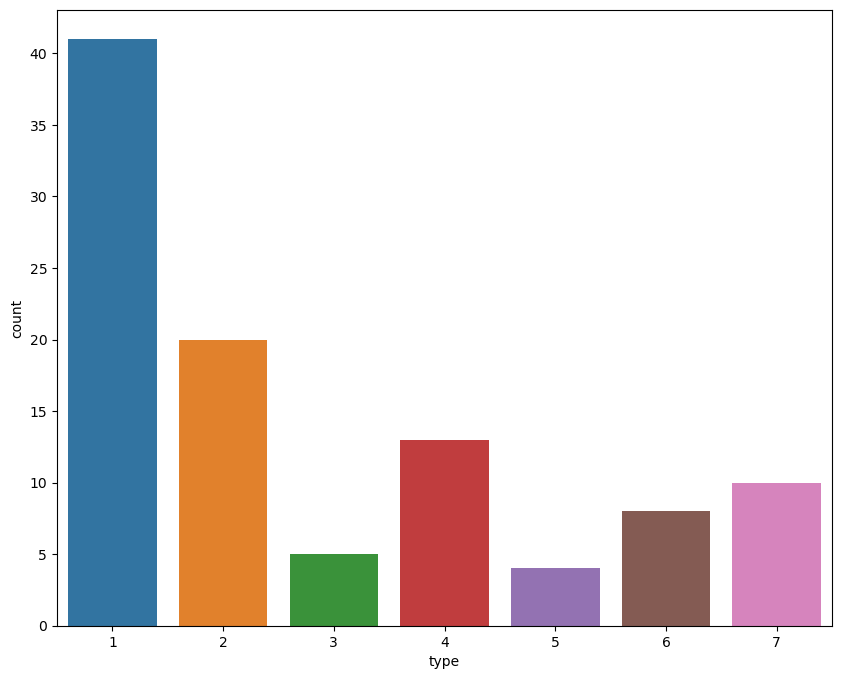

In [15]:
print(zoo.type.value_counts())
plt.figure(figsize = (10,8))
sns.countplot(zoo.type)
plt.show()

In [17]:
data = zoo.copy()
data.drop("animal name",axis = 1,inplace = True)

In [21]:
x = data.drop("type",axis = 1)# input data
y = data.type.values# target data

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)
print("x_train shape : ",x_train.shape)
print("x_test shape : ",x_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (60, 16)
x_test shape :  (41, 16)
y_train shape :  (60,)
y_test shape :  (41,)


Best K value =  1
Best score =  0.9512195121951219


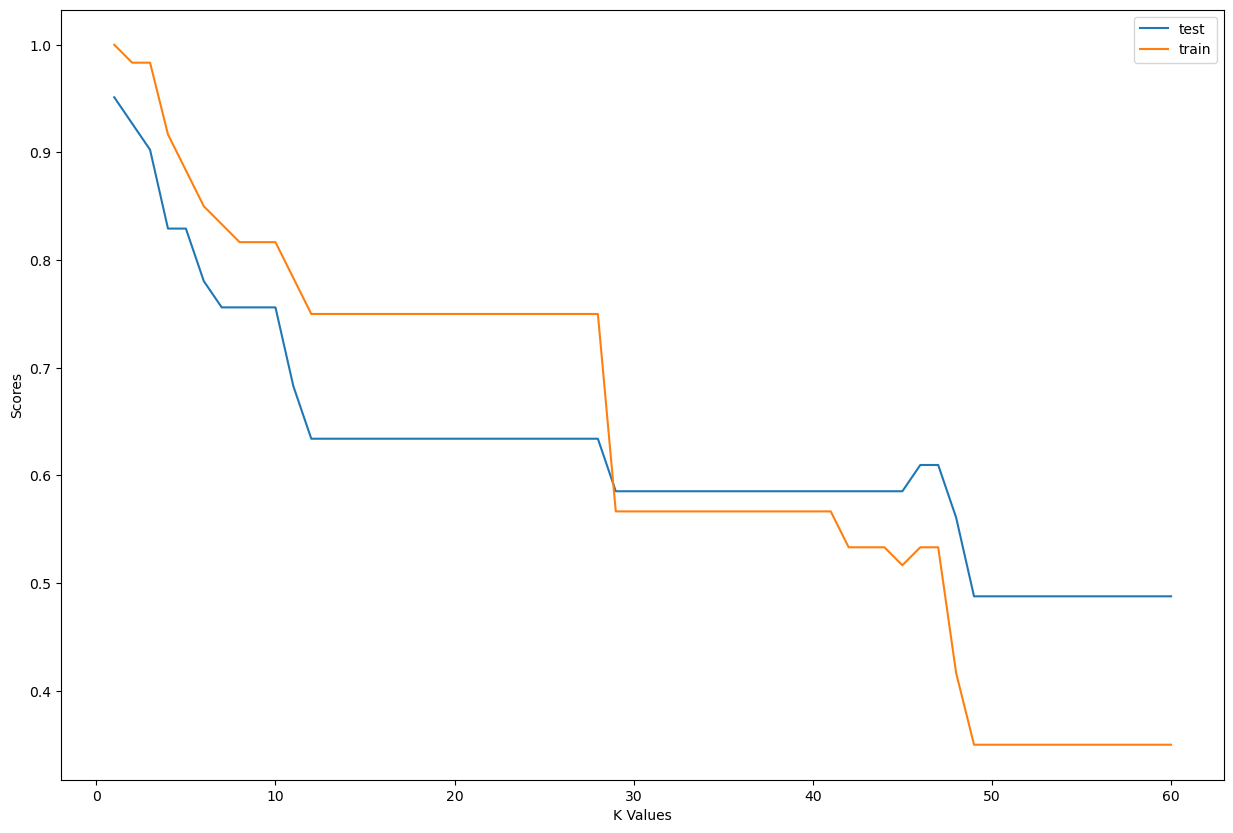

In [23]:
from sklearn.neighbors import KNeighborsClassifier
scr_max = 0
knn_test_score_list = []
knn_train_score_list = []

for i in range(1,x_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    knn_test_scr = knn.score(x_test,y_test)
    knn_test_score_list.append(knn_test_scr)
    knn_train_scr = knn.score(x_train,y_train)
    knn_train_score_list.append(knn_train_scr)
    if knn_test_scr >= scr_max:
        scr_max = knn_test_scr
        index = i

print("Best K value = ",index)
print("Best score = ",scr_max)

plt.figure(figsize = (15,10))
plt.plot(range(1,x_train.shape[0]+1),knn_test_score_list,label = "test")
plt.plot(range(1,x_train.shape[0]+1),knn_train_score_list,label = "train")
plt.legend()
plt.xlabel("K Values")
plt.ylabel("Scores")
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test,y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)
print("confusion matrix : \n",cm_knn)
print("classification report : \n",cr_knn)

confusion matrix : 
 [[20  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  1  4]]
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         5
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       0.83      1.00      0.91         5
           7       1.00      0.80      0.89         5

    accuracy                           0.95        41
   macro avg       0.93      0.90      0.89        41
weighted avg       0.96      0.95      0.95        41



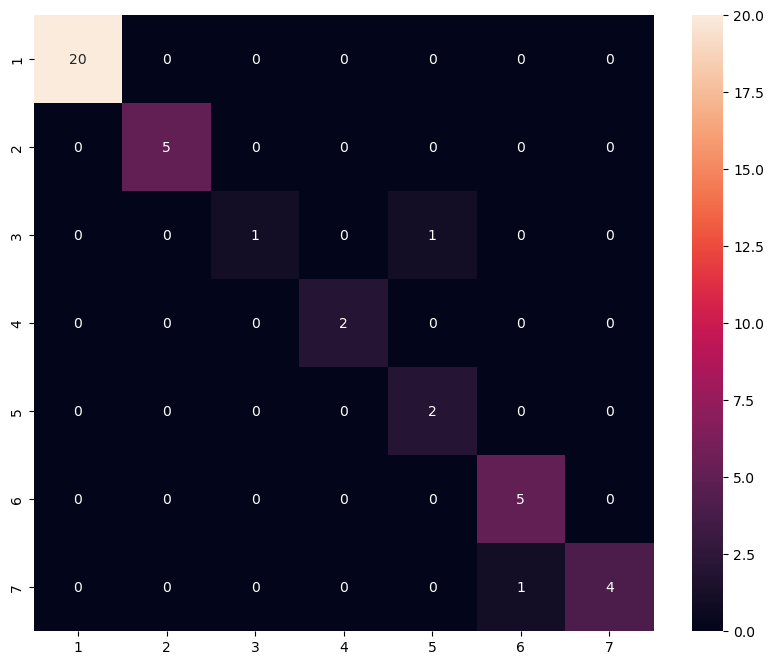

In [28]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_knn,annot = True,xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.show()

target 3 and 7 have false prediction
We can see KNN is better